# Explore here

In [8]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import joblib

Data Overview:
• 20640 houses • 3 features

Sample Data:


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462



📊 Key Statistics:


,count,mean,std,min,25%,50%,75%,max
Latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
Longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
MedInc,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001


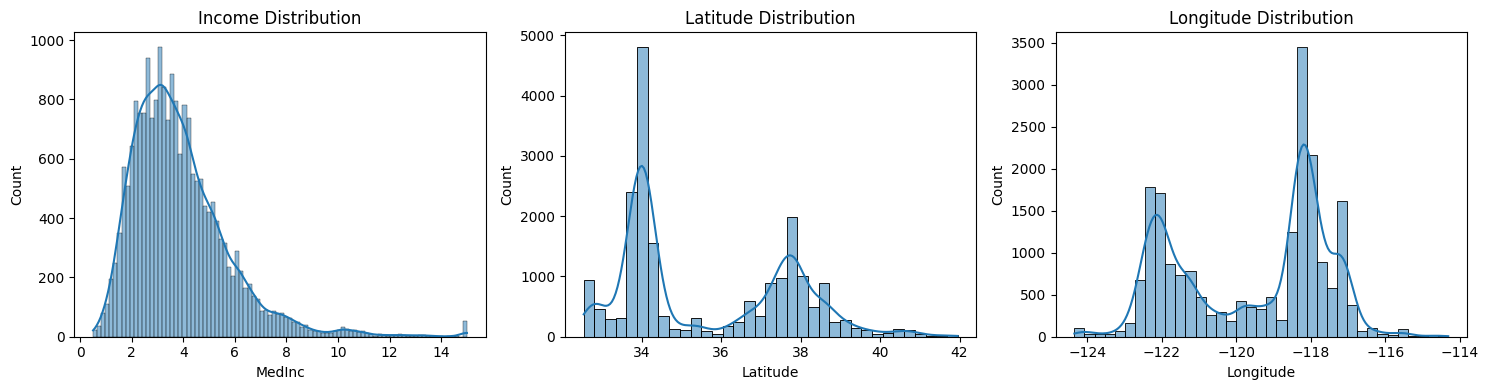

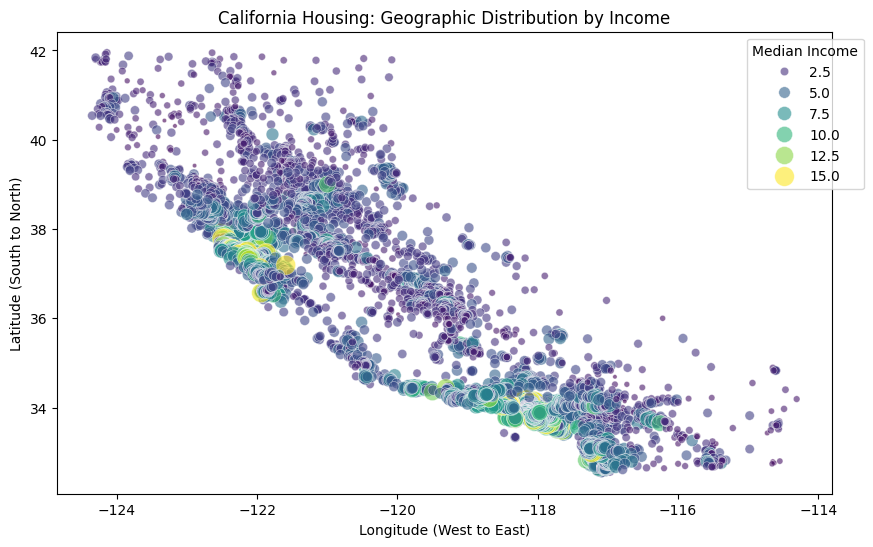

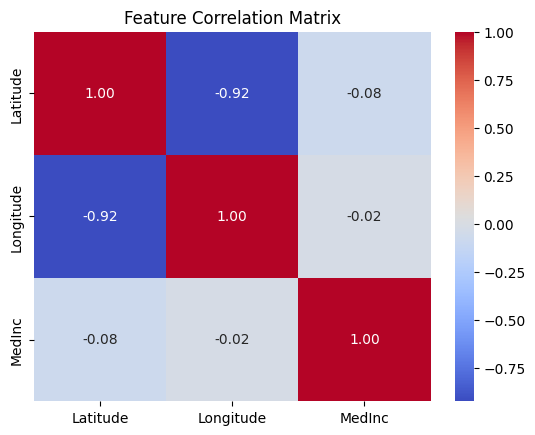

In [9]:
# Load dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

# Filter relevant columns
df = df[['Latitude', 'Longitude', 'MedInc']]

# Preview data
print("Data Overview:")
print(f"• {df.shape[0]} houses • {df.shape[1]} features")
print("\nSample Data:")
display(df.head())

# Basic statistics
print("\n📊 Key Statistics:")
display(df.describe().T)

# Visualize distributions
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['MedInc'], kde=True)
plt.title('Income Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Latitude'], kde=True)
plt.title('Latitude Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Longitude'], kde=True)
plt.title('Longitude Distribution')

plt.tight_layout()
plt.show()

# Geographic visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, 
                size='MedInc', hue='MedInc', alpha=0.6,
                palette='viridis', sizes=(10, 200))
plt.title('California Housing: Geographic Distribution by Income')
plt.xlabel('Longitude (West to East)')
plt.ylabel('Latitude (South to North)')
plt.legend(title='Median Income', bbox_to_anchor=(1.05, 1))
plt.show()

# Correlation analysis
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

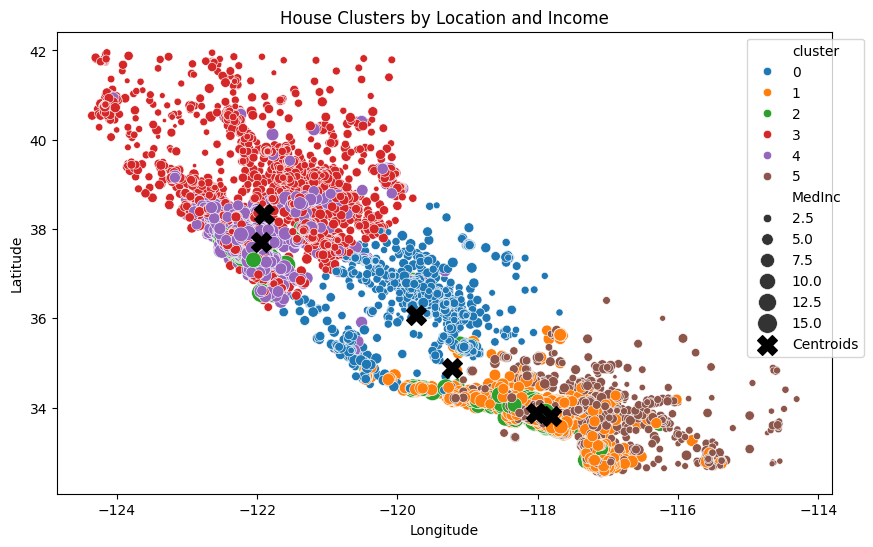


🏠 Cluster Summary:


,MedInc,Latitude,Longitude,Count
cluster,,,,
0,2.621249,36.113323,-119.727696,1658
1,5.302799,33.864027,-118.024716,4209
2,10.456234,34.866973,-119.199504,565
3,2.828793,38.345579,-121.897106,4893
4,5.513036,37.707552,-121.951228,2753
5,2.788585,33.815664,-117.818068,6562


In [10]:
# Preprocess data
X = df.copy()
X_train_orig, X_test_orig = train_test_split(X, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_orig)
X_test_scaled = scaler.transform(X_test_orig)


# Train K-Means
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)


X_train_orig['cluster'] = train_clusters
X_test_orig['cluster'] = test_clusters


df = pd.concat([X_train_orig, X_test_orig])


# Visualize clusters
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Longitude', y='Latitude', data=df,
                          hue='cluster', palette='tab10',
                          size='MedInc', sizes=(10, 200))
plt.title('House Clusters by Location and Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot cluster centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 1], centers[:, 0], c='black', 
            s=200, marker='X', label='Centroids')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Analyze cluster characteristics
cluster_summary = df.groupby('cluster').agg({
    'MedInc': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'cluster': 'count'
}).rename(columns={'cluster': 'Count'})
print("\n🏠 Cluster Summary:")
display(cluster_summary)

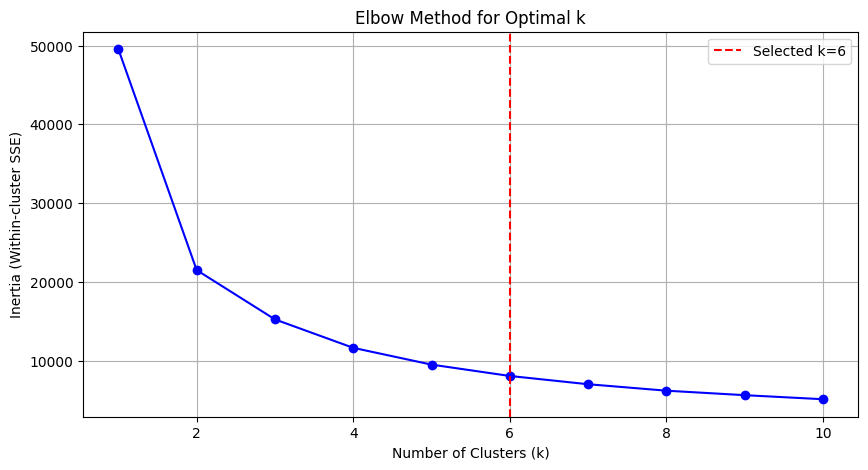

In [11]:
# Elbow method visualization
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X_train_scaled)
    inertias.append(kmeans_test.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=6, color='r', linestyle='--', label='Selected k=6')
plt.legend()
plt.grid(True)
plt.show()

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       1.00      1.00      1.00       829
           2       1.00      0.98      0.99       112
           3       0.99      0.99      0.99       962
           4       0.99      1.00      0.99       514
           5       1.00      1.00      1.00      1374

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



/tmp/ipykernel_7901/1065143506.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


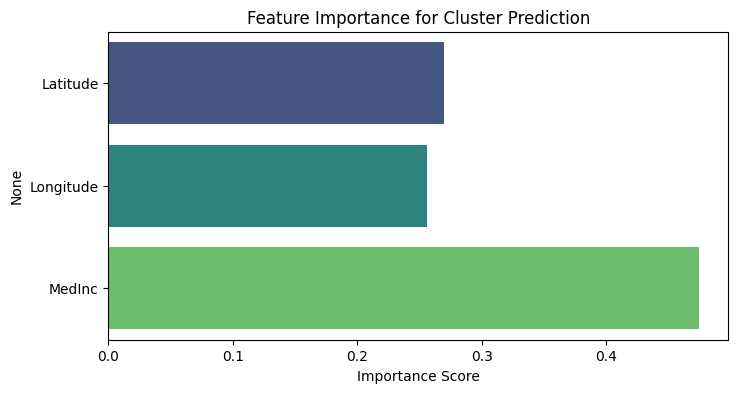

In [12]:
# Prepare data for supervised learning
X_train_sup = X_train_orig[['Latitude', 'Longitude', 'MedInc']]
y_train_sup = X_train_orig['cluster']
X_test_sup = X_test_orig[['Latitude', 'Longitude', 'MedInc']]
y_test_sup = X_test_orig['cluster']


# Train Random Forest classifier
rf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)
rf.fit(X_train_sup, y_train_sup)

# Evaluate model
y_pred = rf.predict(X_test_sup)
print("📊 Classification Report:")
print(classification_report(y_test_sup, y_pred))

# Visualize feature importance
importances = rf.named_steps['randomforestclassifier'].feature_importances_
features = X_supervised.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title('Feature Importance for Cluster Prediction')
plt.xlabel('Importance Score')
plt.show()

✅ Models saved successfully!

🔍 Cluster Interpretation:


MedInc                              Latitude   Longitude
              mean     min      max       std       mean        mean
cluster                                                             
0         2.621249  0.4999   4.9464  0.883400  36.113323 -119.727696
1         5.302799  3.9485   8.4284  0.989530  33.864027 -118.024716
2        10.456234  7.5696  15.0001  2.043603  34.866973 -119.199504
3         2.828793  0.4999   4.5590  0.807018  38.345579 -121.897106
4         5.513036  3.9792   9.5551  1.122860  37.707552 -121.951228
5         2.788585  0.4999   4.1458  0.773223  33.815664 -117.818068

/tmp/ipykernel_7901/2030904524.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='MedInc', data=df, palette='tab10')


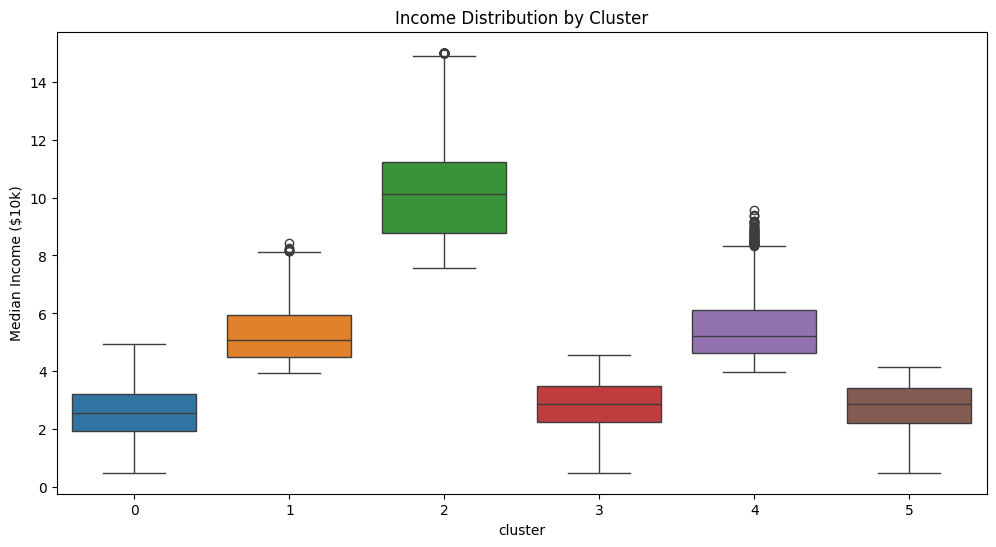

In [13]:
# Save models
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(rf, 'cluster_classifier.pkl')
print("✅ Models saved successfully!")

# Cluster interpretation
print("\n🔍 Cluster Interpretation:")
cluster_stats = df.groupby('cluster').agg({
    'MedInc': ['mean', 'min', 'max', 'std'],
    'Latitude': 'mean',
    'Longitude': 'mean'
})
display(cluster_stats)

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='MedInc', data=df, palette='tab10')
plt.title('Income Distribution by Cluster')
plt.ylabel('Median Income ($10k)')
plt.show()